# 5주차 모델링2 과제 -성지수

In [162]:
#기본 라이브러리
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno 
from fancyimpute import IterativeImputer
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #plot내 글씨를 선명하게 해주는 옵션
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

In [163]:
# working directory 확인
os.getcwd()

'C:\\Users\\jisoo sung\\비어플과제'

In [164]:
# 데이터 로드
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 데이터 확인
print("Train 데이터 크기:", train.shape)
print("Test 데이터 크기:", test.shape)

# Train 데이터의 처음 몇 행 확인
train.head()

Train 데이터 크기: (8040, 14)
Test 데이터 크기: (720, 13)


,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,NaN,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,NaN,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [165]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

In [166]:
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8040 entries, 0 to 8039
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8040 non-null   object 
 1   Rented Bike Count          8040 non-null   int64  
 2   Hour                       8040 non-null   int64  
 3   Temperature(째C)            7240 non-null   float64
 4   Humidity(%)                8040 non-null   int64  
 5   Wind speed (m/s)           7238 non-null   float64
 6   Visibility (10m)           8040 non-null   int64  
 7   Dew point temperature(째C)  8040 non-null   float64
 8   Solar Radiation (MJ/m2)    8040 non-null   float64
 9   Rainfall(mm)               8040 non-null   float64
 10  Snowfall (cm)              8040 non-null   float64
 11  Seasons                    7238 non-null   object 
 12  Holiday                    8040 non-null   object 
 13  Functioning Day            8040 non-null   objec

### 따릉이 train, test 데이터 전처리
이전 과제에서 자세하게 다뤄서 간략하게 했습니다

In [167]:
print(train.isna().sum().sort_values())
print(test.isna().sum().sort_values())

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(째C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Temperature(째C)              800
Wind speed (m/s)             802
Seasons                      802
dtype: int64
Date                          0
Hour                          0
Humidity(%)                   0
Visibility (10m)              0
Dew point temperature(째C)     0
Solar Radiation (MJ/m2)       0
Rainfall(mm)                  0
Snowfall (cm)                 0
Holiday                       0
Functioning Day               0
Wind speed (m/s)             74
Seasons                      74
Temperature(째C)              76
dtype: int64


In [168]:
# 데이터를 날짜와 시간대로 정렬
train.sort_values(by=['Date', 'Hour'], inplace=True)
test.sort_values(by=['Date', 'Hour'], inplace=True)

In [169]:
# 'Time' 변수 생성 _ 시간대
train['Time'] = ''
train.loc[(train['Hour'] >=0) & (train['Hour'] < 6), 'Time'] = '새벽'
train.loc[(train['Hour'] >=6) & (train['Hour'] < 12), 'Time'] = '아침'
train.loc[(train['Hour'] >=12) & (train['Hour'] < 18), 'Time'] = '낮'
train.loc[(train['Hour'] >=18) , 'Time'] = '밤'

#test
test['Time'] = ''
test.loc[(test['Hour'] >=0) & (test['Hour'] < 6), 'Time'] = '새벽'
test.loc[(test['Hour'] >=6) & (test['Hour'] < 12), 'Time'] = '아침'
test.loc[(test['Hour'] >=12) & (test['Hour'] < 18), 'Time'] = '낮'
test.loc[(test['Hour'] >=18) , 'Time'] = '밤'

In [170]:
# 'Date' 변수를 datetime 형식으로 변환
train['Date'] = pd.to_datetime(train['Date'],format='%d/%m/%Y')
test['Date'] = pd.to_datetime(test['Date'],format='%d/%m/%Y')

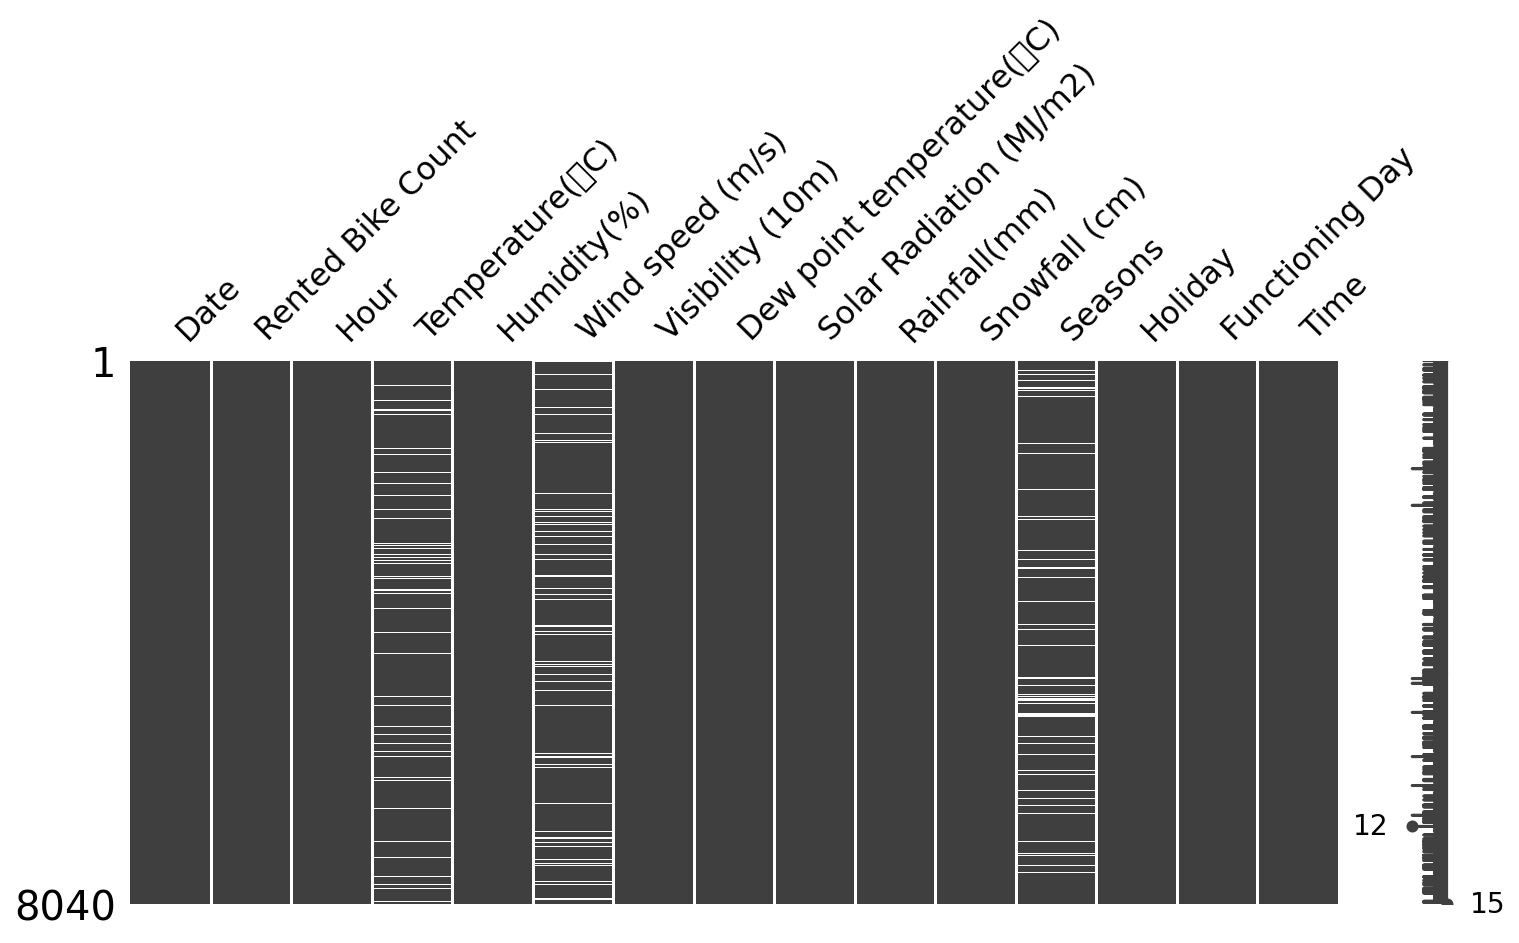

<AxesSubplot:>

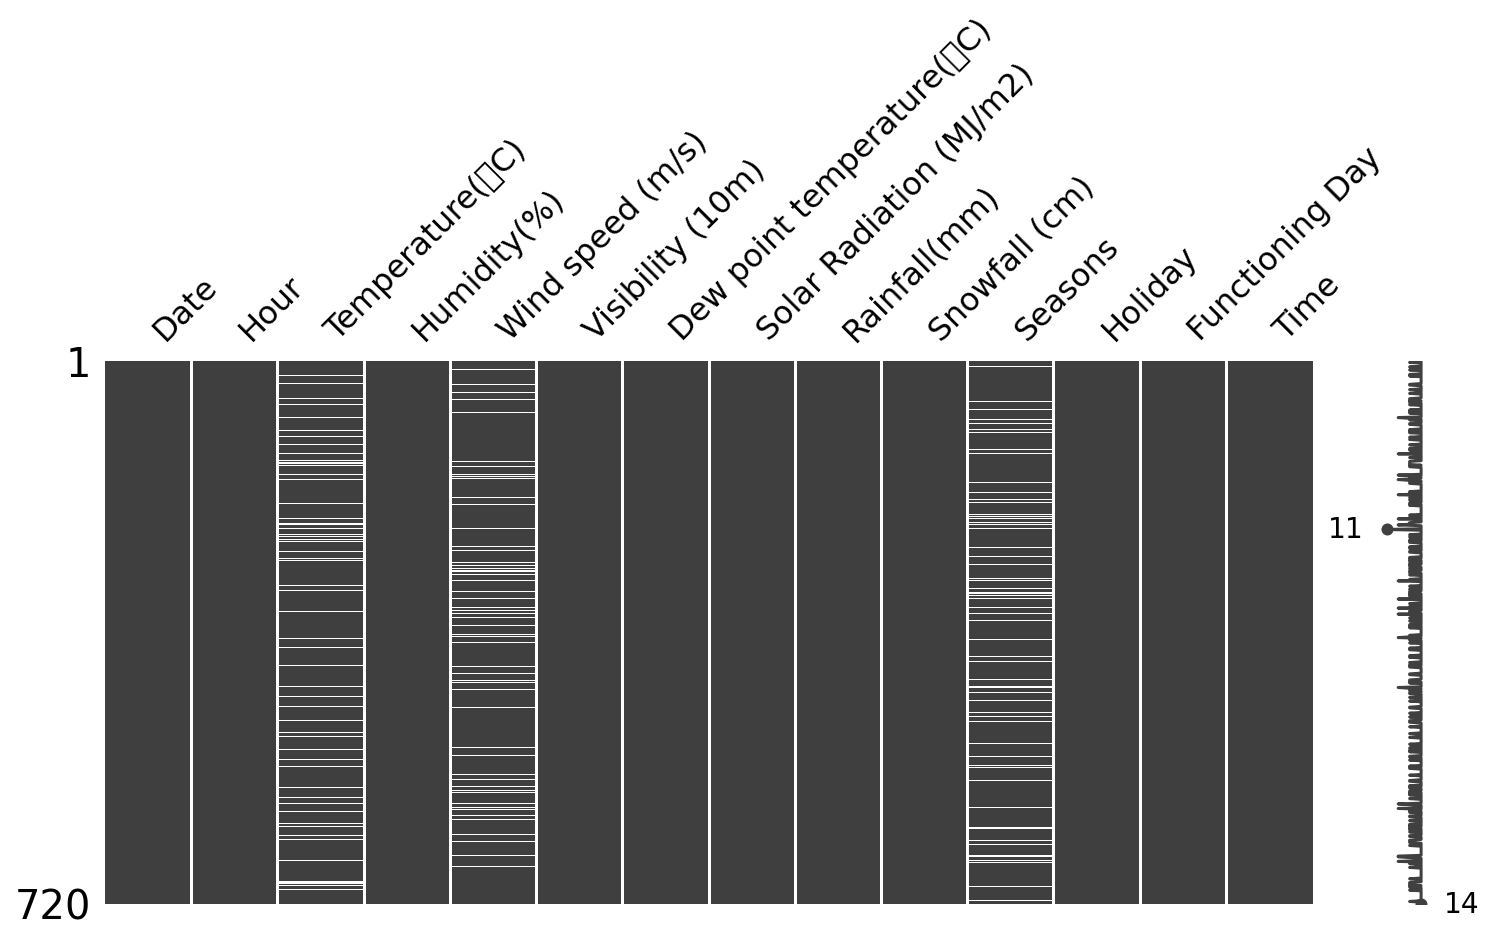

In [171]:
msno.matrix(train, figsize=(12,5))
plt.show()
msno.matrix(test, figsize=(12,5))

In [172]:
# 온도 결측치
# 시간별 온도
print(train.groupby('Hour')['Temperature(째C)'].mean()) #train
print(test.groupby('Hour')['Temperature(째C)'].mean()) #test
# 시간대별 온도
print(train.groupby('Time')['Temperature(째C)'].mean()) #train
print(test.groupby('Time')['Temperature(째C)'].mean()) #test

# 'Temperature(째C)' 열 결측치 각 계절의 시간대별 평균 기온으로 대체
## train data
train.loc[(train['Time'] == '새벽') & (train['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 10.8
train.loc[(train['Time'] == '아침') & (train['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 11.4
train.loc[(train['Time'] == '낮') & (train['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 16.6
train.loc[(train['Time'] == '밤') & (train['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 13.3

## test data
test.loc[(test['Time'] == '새벽') & (test['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 10.8
test.loc[(test['Time'] == '아침') & (test['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 11.4
test.loc[(test['Time'] == '낮') & (test['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 16.6
test.loc[(test['Time'] == '밤') & (test['Temperature(째C)'].isnull()), 'Temperature(째C)'] = 13.3

Hour
0     12.000654
1     11.752508
2     11.816611
3     10.841722
4     10.597959
5     10.462058
6     10.152174
7     10.322034
8     10.704902
9     12.058497
10    13.345704
11    14.949836
12    16.568197
13    16.560784
14    17.315385
15    17.908581
16    17.456811
17    16.649186
18    15.941176
19    14.871053
20    13.653443
21    13.080000
22    12.577703
23    12.158086
Name: Temperature(째C), dtype: float64
Hour
0      6.388462
1      5.846429
2      5.696429
3      5.085185
4      4.944444
5      4.359259
6      4.341379
7      3.657692
8      4.066667
9      5.032143
10     7.704000
11     9.629630
12    10.920000
13    12.514286
14    12.151852
15    12.137037
16    11.786207
17    10.428000
18    10.185185
19     8.960714
20     8.550000
21     7.472000
22     7.325000
23     7.017857
Name: Temperature(째C), dtype: float64
Time
낮     17.073202
밤     13.726829
새벽    11.244732
아침    11.925305
Name: Temperature(째C), dtype: float64
Time
낮     11.627044
밤      8.246875
새벽

In [173]:
#월 변수 설정
train['Month'] = pd.to_datetime(train['Date']).dt.month
test['Month'] = pd.to_datetime(test['Date']).dt.month

In [174]:
# 계절 변수 결측치 처리 _달 별로 계절 설정
# train data
train.loc[(train['Date'].dt.month.isin([3, 4, 5])), 'Seasons'] = 'Spring'
train.loc[(train['Date'].dt.month.isin([6, 7, 8])), 'Seasons'] = 'Summer'
train.loc[(train['Date'].dt.month.isin([9, 10, 11])), 'Seasons'] = 'Autumn'
train.loc[(train['Date'].dt.month.isin([1, 2, 12])), 'Seasons'] = 'Winter'

# test data
test.loc[(test['Date'].dt.month.isin([3, 4, 5])), 'Seasons'] = 'Spring'
test.loc[(test['Date'].dt.month.isin([6, 7, 8])), 'Seasons'] = 'Summer'
test.loc[(test['Date'].dt.month.isin([9, 10, 11])), 'Seasons'] = 'Autumn'
test.loc[(test['Date'].dt.month.isin([1, 2, 12])), 'Seasons'] = 'Winter'

In [175]:
# 풍속 변수 결측치 처리 _ 계절별 평균 풍속
# 'Wind speed (m/s)' 결측치 계절별 평균 풍속으로 대체
train.loc[(train['Seasons'] == 'Spring') & (train['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.9
train.loc[(train['Seasons'] == 'Summer') & (train['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.6
train.loc[(train['Seasons'] == 'Autumn') & (train['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.6
train.loc[(train['Seasons'] == 'Winter') & (train['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.9

test.loc[(test['Seasons'] == 'Autumn') & (test['Wind speed (m/s)'].isnull()), 'Wind speed (m/s)'] = 1.4

In [176]:
#결측치제거 확인
print(train.isnull().sum())
print(test.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Time                         0
Month                        0
dtype: int64
Date                         0
Hour                         0
Temperature(째C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(째C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Time                         0
Month                        0
dtype: int64


## 범주형 데이터 수치화

In [177]:
from sklearn.preprocessing import OneHotEncoder
# OneHotEncoder 객체 생성"
encoder1 = OneHotEncoder(sparse=False)
result1 = encoder1.fit_transform(train[["Seasons","Holiday","Functioning Day"]])
result1

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [178]:
encoder2 = OneHotEncoder(sparse=False)
result2 = encoder2.fit_transform(test[["Seasons", "Holiday","Functioning Day"]])
result2

array([[1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       ...,
       [1., 1., 0., 1.],
       [1., 1., 0., 1.],
       [1., 1., 0., 1.]])

In [179]:
#train 데이터 카테고리 확인
encoder1.categories_

[array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['Holiday', 'No Holiday'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [180]:
encoder2.categories_

[array(['Autumn'], dtype=object),
 array(['No Holiday'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [181]:
# 결과를 데이터프레임으로 변환
encoded1 = pd.DataFrame(result1, columns=encoder1.get_feature_names_out(["Seasons", "Holiday","Functioning Day"]))
encoded2 = pd.DataFrame(result2, columns=encoder2.get_feature_names_out(["Seasons", "Holiday","Functioning Day"]))

In [182]:
# train 데이터와 병합
train = pd.concat([train, encoded1], axis=1)
train.head()

,Date,Rented Bike Count,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time,Month,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,새벽,12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,새벽,12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,새벽,12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,새벽,12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,2017-12-01,78,4,-6.0,36,1.9,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,새벽,12,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0


In [183]:
# test 데이터와 병합
test = pd.concat([test, encoded2], axis=1)
test.head()

,Date,Hour,Temperature(째C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(째C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Time,Month,Seasons_Autumn,Holiday_No Holiday,Functioning Day_No,Functioning Day_Yes
0,2018-11-01,0,5.7,62,2.3,1909,-1.0,0.0,0.0,0.0,Autumn,No Holiday,Yes,새벽,11,1.0,1.0,0.0,1.0
1,2018-11-01,1,5.1,65,1.6,1932,-0.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,새벽,11,1.0,1.0,0.0,1.0
2,2018-11-01,2,4.4,64,1.4,2000,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,새벽,11,1.0,1.0,0.0,1.0
3,2018-11-01,3,4.2,65,0.7,1962,-1.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,새벽,11,1.0,1.0,0.0,1.0
4,2018-11-01,4,3.6,70,0.8,1934,-1.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,새벽,11,1.0,1.0,0.0,1.0


In [184]:
print(train.info())
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8040 entries, 0 to 8039
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8040 non-null   datetime64[ns]
 1   Rented Bike Count          8040 non-null   int64         
 2   Hour                       8040 non-null   int64         
 3   Temperature(째C)            8040 non-null   float64       
 4   Humidity(%)                8040 non-null   int64         
 5   Wind speed (m/s)           8040 non-null   float64       
 6   Visibility (10m)           8040 non-null   int64         
 7   Dew point temperature(째C)  8040 non-null   float64       
 8   Solar Radiation (MJ/m2)    8040 non-null   float64       
 9   Rainfall(mm)               8040 non-null   float64       
 10  Snowfall (cm)              8040 non-null   float64       
 11  Seasons                    8040 non-null   object        
 12  Holida

변수 선택

In [185]:
# 필요없는 열 제거
train = train.drop(['Time', 'Seasons', 'Holiday', 'Functioning Day', 'Date'], axis=1)
test = test.drop(['Time', 'Seasons', 'Holiday', 'Functioning Day', 'Date'], axis=1)

In [186]:
# 제거한 후 데이터 확인
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8040 entries, 0 to 8039
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8040 non-null   int64  
 1   Hour                       8040 non-null   int64  
 2   Temperature(째C)            8040 non-null   float64
 3   Humidity(%)                8040 non-null   int64  
 4   Wind speed (m/s)           8040 non-null   float64
 5   Visibility (10m)           8040 non-null   int64  
 6   Dew point temperature(째C)  8040 non-null   float64
 7   Solar Radiation (MJ/m2)    8040 non-null   float64
 8   Rainfall(mm)               8040 non-null   float64
 9   Snowfall (cm)              8040 non-null   float64
 10  Month                      8040 non-null   int64  
 11  Seasons_Autumn             8040 non-null   float64
 12  Seasons_Spring             8040 non-null   float64
 13  Seasons_Summer             8040 non-null   float

In [187]:
# X(독립변수), y(종속변수) 분리
X = train.drop('Rented Bike Count', axis=1)
y = train['Rented Bike Count']

In [188]:
# train, vaild
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

# 각 셋의 크기 확인
print("Train set size:", X_train.shape, y_train.shape)
print("Validation set size:", X_val.shape, y_val.shape)

Train set size: (6432, 18) (6432,)
Validation set size: (1608, 18) (1608,)


In [189]:
# 클래스 분포 확인
print(train['Rented Bike Count'].value_counts())

0       223
103      18
223      18
262      18
189      17
       ... 
893       1
885       1
2098      1
873       1
2047      1
Name: Rented Bike Count, Length: 2138, dtype: int64


## 스케일링

## Standard Scaler
- 주어진 데이터의 특성에서 평균을 빼고 표준편차로 나누는 방법
- 표준 정규 분포를 갖도록 하는 스케일링 방법

In [190]:
#객체 생성
ss = StandardScaler()

#학습 및 변환
X_train_ss = ss.fit_transform(X_train) #fit은 꼭 train에서만 사용해야 함.
X_val_ss = ss.transform(X_val)
#X_test_ss = ss.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'평균: {X_train_ss.mean()}\n분산: {X_train_ss.std()}')
print("<valid 셋>")
print(f'평균: {X_val_ss.mean()}\n분산: {X_val_ss.std()}')

<train 셋>
평균: -1.387011628332147e-17
분산: 1.0
<valid 셋>
평균: -0.0016148265227522083
분산: 1.0167417565483614


## MinMax Scaler
- 데이터의 feature를 정규화 
- 데이터를 일정한 범위로 변환, 더 좋은 성능으로 돕는 기술
- 최솟값, 최댓값을 사용하여 데이터를 [0,1] 범위로 변환함

In [191]:

#객체 생성
mms = MinMaxScaler()

#학습 및 변환
X_train_mms = mms.fit_transform(X_train)
X_val_mms = mms.transform(X_val)
#X_test_mms = mms.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'최대: {X_train_mms.max()}\n최소: {X_train_mms.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mms.max()}\n최소: {X_val_mms.min()}')

<train 셋>
최대: 1.0000000000000002
최소: 0.0
<valid 셋>
최대: 1.0000000000000002
최소: -0.00560652395514781


## MaxAbs Scaler
- 주어진 데이터의 feature를 정규화
- 각 feature의 최댓값의 절댓값으로 나누어 스케일을 맞추는 방법
- 모든 데이터가 [-1,1] 로 매핑

In [192]:

#객체 생성
mas = MaxAbsScaler()

#학습 및 변환
X_train_mas = mas.fit_transform(X_train)
X_val_mas = mas.transform(X_val)
#X_test_mas = mas.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'최대: {X_train_mas.max()}\n최소: {X_train_mas.min()}')
print("<valid 셋>")
print(f'최대: {X_val_mas.max()}\n최소: {X_val_mas.min()}')

<train 셋>
최대: 1.0
최소: -1.0
<valid 셋>
최대: 1.0
최소: -0.9705882352941175


## Robust Scaler
- 이상치에 강건한 특성을 갖는 정규화 방법
- 중앙값과 IQR 사용하여 스케일링

In [193]:

#객체 생성
rs = RobustScaler()

#학습 및 변환
X_train_rs = rs.fit_transform(X_train)
X_val_rs = rs.transform(X_val)
#X_test_rs = rs.transform(X_test) #test셋이 있는 경우

print("<train 셋>")
print(f'평균: {X_train_rs.mean()}\n분산: {X_train_rs.std()}')
print("<valid 셋>")
print(f'평균: {X_val_rs.mean()}\n분산: {X_val_rs.std()}')
#중앙값과 사분위값을 보는 게 정석이긴 함. 

<train 셋>
평균: 0.08996696561696226
분산: 0.6090558705738223
<valid 셋>
평균: 0.08793661592165893
분산: 0.6070619521443665


In [194]:
intersection = set(train.columns) & set(test.columns)
intersection

{'Dew point temperature(째C)',
 'Functioning Day_No',
 'Functioning Day_Yes',
 'Holiday_No Holiday',
 'Hour',
 'Humidity(%)',
 'Month',
 'Rainfall(mm)',
 'Seasons_Autumn',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Temperature(째C)',
 'Visibility (10m)',
 'Wind speed (m/s)'}

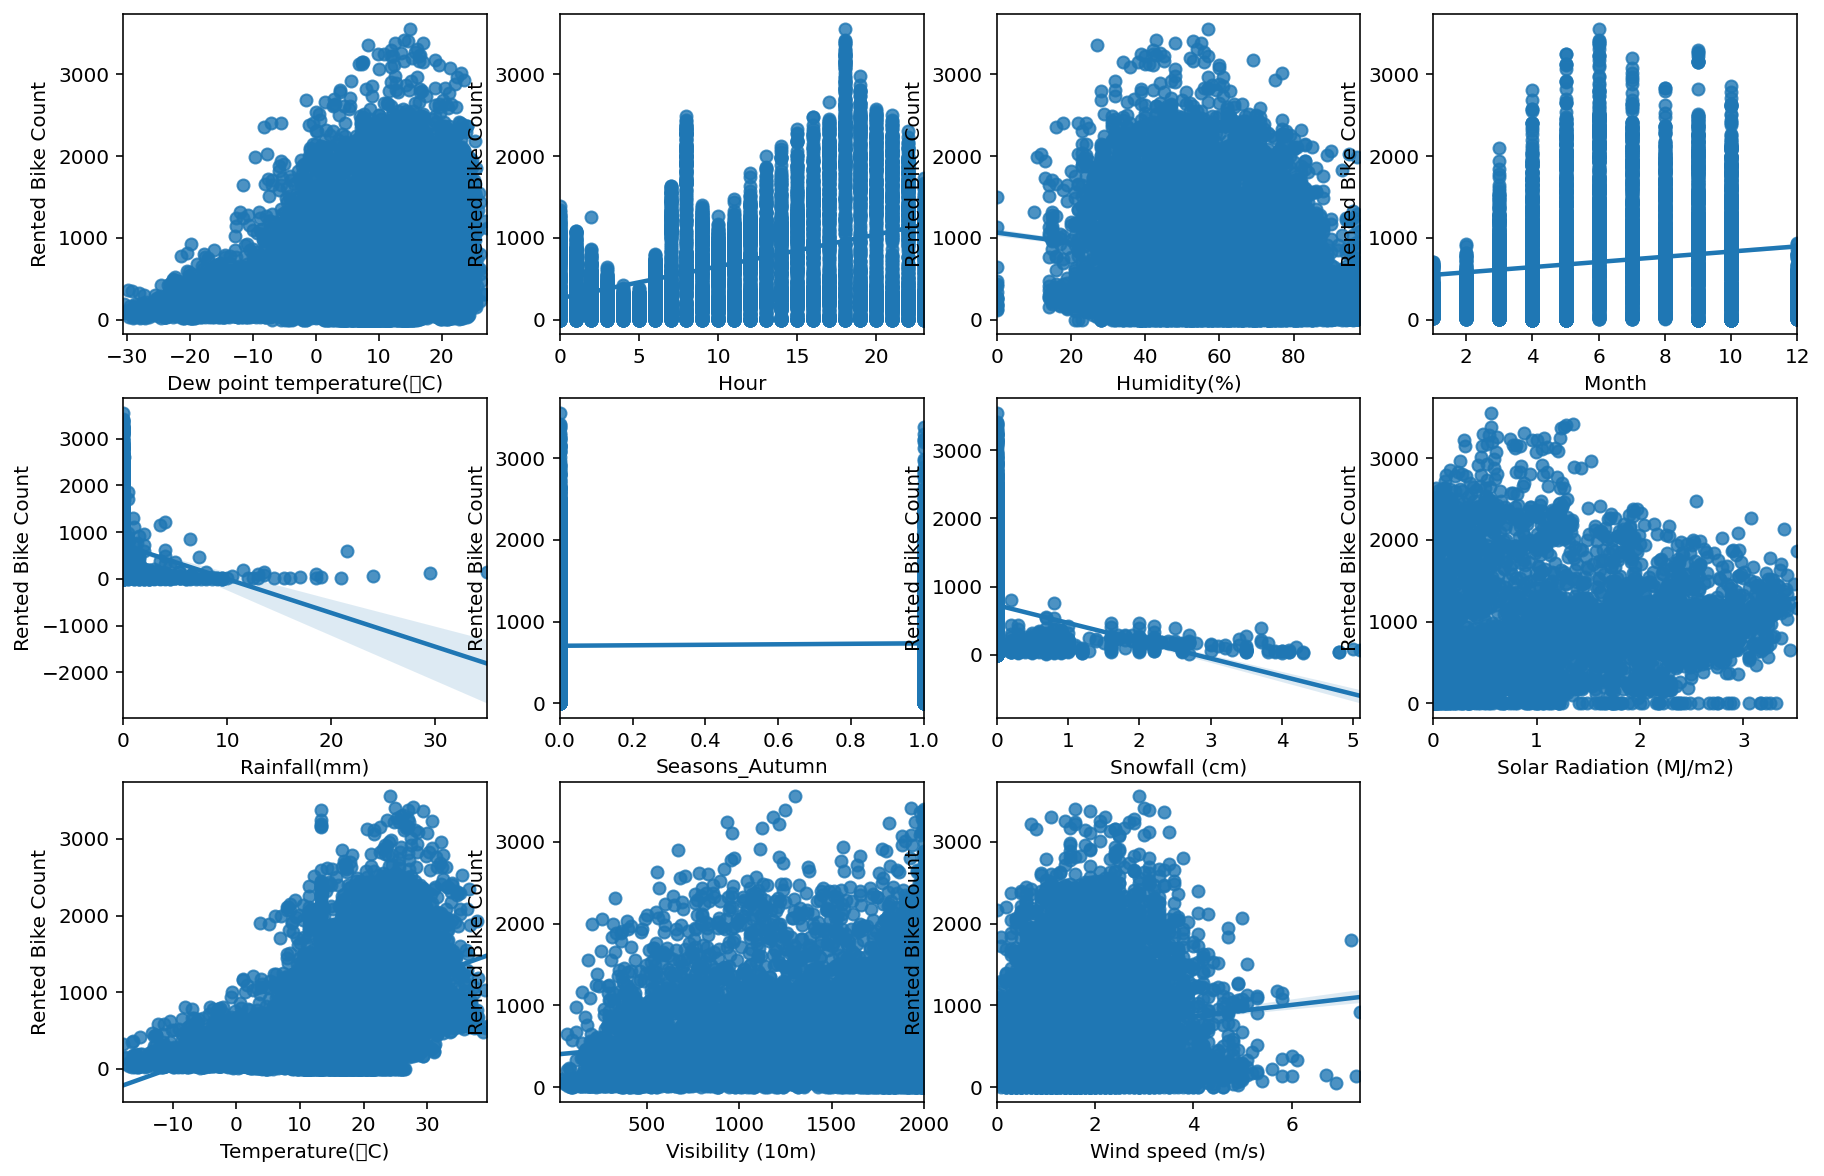

In [195]:
features= ['Dew point temperature(째C)',
 'Hour',
 'Humidity(%)',
 'Month',
 'Rainfall(mm)',
 'Seasons_Autumn',
 'Snowfall (cm)',
 'Solar Radiation (MJ/m2)',
 'Temperature(째C)',
 'Visibility (10m)',
 'Wind speed (m/s)']
plt.figure(figsize=(15,10))
for i , features in enumerate(features):
    plt.subplot(3,4,i+1)
    sns.regplot(x=features, y='Rented Bike Count', data=train)
    
plt.show()

## 모델 결정
- Decision Tree
- Random Forest
- XGBoost
- Linear Regression
### 따릉이 대여 횟수(Rented Bike Count) = 타겟 값

## DecisionTree
- 입력값 조합의 의사결정규칙에 따라 예측
- 해석이 쉽다

### DecisionTree 모델
- train 데이터에 대한 결정 계수 1.0으로 완벽하게 데이터 설명
- vaild 데이터에 대한 결정 계수 매우 낮음 ( 모델이 새로운 데이터에 대해 일반화 되지 못하고 과적합되었다고 예상됨 )
- MSE,RMSE가 상대적으로 높고 MAE가 높음

In [196]:
# 모델 선언
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state = 42)

In [197]:
# 하이퍼파라미터 확인
print(model1.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [198]:
#모델 학습
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [199]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(model1.score(X_train, y_train))
print(model1.score(X_val, y_val))

#예측값
pred = model1.predict(X_val) 

mae = mean_absolute_error(y_val, pred)
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mean_squared_error(y_val, pred))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

1.0
0.021144278606965175
MSE: 185798.666045
RMSE: 431.043694
MAE: 261.356343


## RandomForest
- 여러 개의 의사 결정 트리 구성하여 각 트리의 예측을 평균 또는 투표로 최종 예측 수행
- 각 트리는 독립적으로 학습
- 일반화 및 성능이 우수하고 과적합 문제가 잘 발생하지 않는다
- 메모리 문제 발생

### RandomForest 모델
- train 데이터에 대한 결정 계수 0.971로 높은 값을 가짐
- vaild 데이터에 대한 결정 계수 0.83으로 비교적 높은 값 가짐 
- MSE,RMSE가 모델1보다 낮고, MAE도 낮음

In [200]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(random_state=42)

In [201]:
# 하이퍼파라미터 확인하기
print(model2.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [202]:
# 모델 학습
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [203]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(model2.score(X_train, y_train))
print(model2.score(X_val, y_val))

#예측값
pred2 = model2.predict(X_val) 

mae = mean_absolute_error(y_val, pred2)
mse = mean_squared_error(y_val, pred2)
rmse = np.sqrt(mean_squared_error(y_val, pred2))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.9710403802038396
0.830119013711064
MSE: 74526.269789
RMSE: 272.995000
MAE: 164.183408


## XGBoost
- 많은 메모리 소모
- 약한 예측 모델인 결정 트리를 순차적으로 학습하여 강력한 예측 모델 구축
- 빠른 속도와 높은 성능

### XGBoost 모델
- train 데이터에 대한 결정 계수 0.966으로 높은 값을 가짐
- vaild 데이터에 대한 결정 계수 0.838으로 비교적 높은 값 가짐(모델2와 비슷) 
- MSE,RMSE가 모델1과 동일, MAE은 모델1보다 낮음

In [204]:
#모델 선언
from xgboost import XGBRegressor
model3 = XGBRegressor(random_state=42)

In [205]:
# 하이퍼파라미터 확인하기
print(model3.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [206]:
#모델학습
model3.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [207]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(model3.score(X_train, y_train))
print(model3.score(X_val, y_val))

#예측값
pred3 = model1.predict(X_val) 

mae = mean_absolute_error(y_val, pred3)
mse = mean_squared_error(y_val, pred3)
rmse = np.sqrt(mean_squared_error(y_val, pred3))
print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

0.9656475155574382
0.8382108734808078
MSE: 185798.666045
RMSE: 431.043694
MAE: 261.356343


 # XGBoost 모델 선정
 3가지 모델 학습 결과, randomforest와 xgboost가 decisiontree보다 우수하며, 그 중에서도 xgboost가 약간 더 나은 성능을 보임. 따라서 이 상황에서는 xgboost를 선택하는 것이 좋다고 생각함

## 하이퍼파라미터 튜닝
- n_estimators: 트리 개수 지정
- learning_rate: 각 트리의 기여를 줄이는 정도 결정
- max_depth: 트리의 최대 깊이를 제어
- min_child_weight: 분할할 때 필요한 최소한의 샘플 가중치의 합
- subsample: 각 트리를 학습하는 데 사용할 훈련 데이터의 비율
- colsample_bytree: 각 트리를 학습하는 데 사용할 특성의 비율
- gamma: 분할 할 때 필요한 최소한의 손실 감소량 지정
- reg_alpha와 reg_lambda: L1,L2 규제 조절(복잡도, 과적합)

In [208]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# 모델 초기화
xgb_model = XGBRegressor(random_state=42)

# 탐색할 하이퍼파라미터 값들 설정
param_grid = {
    'n_estimators': [100, 200, 300],  # 트리 개수
    'learning_rate': [0.01, 0.05, 0.1],  # 학습률
    'max_depth': [3, 5, 7],  # 최대 깊이
    'min_child_weight': [1, 3, 5],  # 최소한의 샘플 가중치 합
    'subsample': [0.7, 0.8, 0.9],  # 데이터 샘플링 비율
    'colsample_bytree': [0.7, 0.8, 0.9],  # 트리에 사용되는 특성의 비율
}

In [209]:
# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# 모델 피팅 (학습)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='neg_mean_squared_error')

In [210]:
# 최적의 하이퍼파라미터 출력
print("Best parameters : ", grid_search.best_params_)

Best parameters :  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 200, 'subsample': 0.8}


In [211]:

# 최적의 평가 점수 출력
print("Best score: ", grid_search.best_score_)

Best score:  -73932.61426310244


In [212]:
# 모델 훈련
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [213]:
# 모델 학습

xgb_model.fit(X_train, y_train)

# 모델 평가
pred = xgb_model.predict(X_val) # 검증 데이터의 예측값

mse = mean_squared_error(y_val, pred) 
rmse = np.sqrt(mean_squared_error(y_val, pred)) 
mae = mean_absolute_error(y_val, pred) 

print("MSE: %f" % (mse))
print("RMSE: %f" % (rmse))
print("MAE: %f" % (mae))

MSE: 70976.395625
RMSE: 266.413955
MAE: 165.162737


### 기존 모델
- MSE: 185798.666045
- RMSE: 431.043694
- MAE: 261.356343

### 튜닝 후
- MSE: 70976.395625
- RMSE: 266.413955
- MAE: 165.162737
}
모델 튜닝 후의 성능이 기존 모델 대비 향상된 것으로 보임

In [227]:
# 변수 중요도 계산

importances_values = pd.Series(xgb_model.feature_importances_, index=X_val.columns).sort_values(ascending=False)

# 변수 중요도 시각화

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=importances_values, y=importances_values.index)
plt.show()

ValueError: Length of passed values is 16, index implies 18.

In [224]:
# 중요도 높은 변수만 모델 돌려보기

# 변수 중요도 상위 7개(Rainfall(mm)~Functioning Day_No) 항목 추출
top7 = importances_values.head(7).index.tolist()

# 상위 7개 변수만을 포함하는 새로운 데이터프레임 생성
X_val_top7 = X_val[top7]

# 모델 재학습
xgb_model.fit(X_train[top7], y_train)

# 모델 예측
pred = xgb_model.predict(X_val_top7)

# 모델 평가
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, pred)

print("MSE: %f" % mse)
print("RMSE: %f" % rmse)
print("MAE: %f" % mae)

MSE: 84652.046001
RMSE: 290.950247
MAE: 175.096083


In [225]:
# 중요도 낮은 변수 제외 후 모델 돌려보기

# 변수 중요도 상위 16개
top16 = importances_values.head(16).index.tolist()

# 상위 7개 변수만을 포함하는 새로운 데이터프레임 생성
X_val_top16 = X_val[top16]

# 모델 재학습
xgb_model.fit(X_train[top16], y_train)

# 모델 예측
pred = xgb_model.predict(X_val_top16)

# 모델 평가
mse = mean_squared_error(y_val, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, pred)

print("MSE: %f" % mse)
print("RMSE: %f" % rmse)
print("MAE: %f" % mae)

MSE: 70690.539669
RMSE: 265.876926
MAE: 165.011139


### 기존 모델
- MSE: 185798.666045
- RMSE: 431.043694
- MAE: 261.356343

### 튜닝 후
- MSE: 70976.395625
- RMSE: 266.413955
- MAE: 165.162737

### 중요도 상위 7개
- MSE: 84652.046001
- RMSE: 290.950247
- MAE: 175.096083

### 중요도 낮은 변수 2개 제외
- MSE: 70690.539669
- RMSE: 265.876926
- MAE: 165.011139

중요도 낮은 변수 2개를 제외한 모델이 성능이 가장 좋은 것으로 보임

In [233]:
X_test = test.copy()

In [234]:
# XGBoost 모델 재선언 (최종)
final = XGBRegressor(random_state=42,n_estimators= 300, max_depth=8, learning_rate=0.05)

# 최종 모델 재학습
final.fit(X_train[top16], y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [235]:
#### test 데이터로 예측

test['Rented Bike Count'] = 0
test['Rented Bike Count'] = final.predict(X_test)

ValueError: feature_names mismatch: ['Rainfall(mm)', 'Temperature(째C)', 'Hour', 'Month', 'Solar Radiation (MJ/m2)', 'Humidity(%)', 'Functioning Day_No', 'Dew point temperature(째C)', 'Seasons_Summer', 'Seasons_Winter', 'Visibility (10m)', 'Seasons_Spring', 'Wind speed (m/s)', 'Seasons_Autumn', 'Holiday_Holiday', 'Snowfall (cm)'] ['Hour', 'Temperature(째C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(째C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Seasons_Autumn', 'Holiday_No Holiday', 'Functioning Day_No', 'Functioning Day_Yes', 'Rented Bike Count']
expected Holiday_Holiday, Seasons_Summer, Seasons_Winter, Seasons_Spring in input data
training data did not have the following fields: Functioning Day_Yes, Rented Bike Count, Holiday_No Holiday